# Text and Sequences

#### References
* convolution layers:  
https://www.youtube.com/watch?v=KuXjwB4LzSA

* maxpool layers:  
https://www.youtube.com/watch?v=8oOgPUO-TBY

In [50]:
import matplotlib.pyplot as plt

def plot_loss_and_accuracy(history, loss=True, accuracy=True):
    if loss:
        loss = history.history['loss']
        val_loss = history.history['val_loss']
        epochs = range(1, len(loss) + 1)

        # Plot training and validation loss
        plt.figure()
        plt.plot(epochs, loss, 'bo', label='Training loss')
        plt.plot(epochs, val_loss, 'b', label='Validation loss')
        plt.title('Training and validation loss')
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.legend()

    if accuracy:
        acc = history.history['acc']
        val_acc = history.history['val_acc']
        epochs = range(1, len(acc) + 1)

        # Plot training and validation accuracy
        plt.figure()
        plt.plot(epochs, acc, 'bo', label='Training acc')
        plt.plot(epochs, val_acc, 'b', label='Validation acc')
        plt.title('Training and validation accuracy')
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy")
        plt.legend()

### Working with text data

**3 ways to vectorise text:**  
*Apply a tokenisation scheme...*
* Segment text into words, and transform each word into a vector. 
* Segment text into characters, and transform each character into a vector.
* Extract n-grams of words or characters, and transform each n-gram into a vector. 


**Tokenization:** Breaking text into tokens (the different units into which you can break down text)  
**N-grams:** Overlapping groups of multiple consecutive words or characters (not order preserving)

*bag-of-2-grams:*
{"The",  "The  cat",  "cat", "cat  sat",  "sat", 
"sat  on",  "on",  "on  the", "the",  "the  mat",  "mat"} 

*bag-of-3-grams:*
{"The",  "The  cat",  "cat", "cat  sat",  "The  cat  sat", 
"sat",  "sat  on",  "on", "cat  sat  on",  "on  the", "the", 
"sat  on  the",  "the  mat", "mat",  "on  the  mat"} 


#### Two major ways to associate a vector with a token
##### 1. one-hot encoding

In [35]:
# ONE-HOT ENCODING OF WORDS
from keras.preprocessing.text import Tokenizer

samples = ['The cat sat on the mat.$', 'The dog ate my homework.@']

tokenizer = Tokenizer()
tokenizer.fit_on_texts(samples)
sequences = tokenizer.texts_to_sequences(samples)

one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')
word_index = tokenizer.word_index

# print(sequences)
print('Found %s unique tokens.' % len(word_index), end='\n\n')

print(word_index,  end='\n\n')

print("'The cat sat on the mat.'")
print(one_hot_results[0], end='\n\n')

print("'The dog ate my homework.'")
print(one_hot_results[1])

Found 9 unique tokens.

{'the': 1, 'cat': 2, 'sat': 3, 'on': 4, 'mat': 5, 'dog': 6, 'ate': 7, 'my': 8, 'homework': 9}

'The cat sat on the mat.'
[0. 1. 1. 1. 1. 1. 0. 0. 0. 0.]

'The dog ate my homework.'
[0. 1. 0. 0. 0. 0. 1. 1. 1. 1.]


In [33]:
# ONE-HOT ENCODING OF CHARACTERS
from keras.preprocessing.text import Tokenizer

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(samples)
sequences = tokenizer.texts_to_sequences(samples)

one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')
word_index = tokenizer.word_index

# print(sequences)
print('Found %s unique tokens.' % len(word_index), end='\n\n')

print(word_index,  end='\n\n')

print("'The cat sat on the mat.'")
print(one_hot_results[0], end='\n\n')

print("'The dog ate my homework.'")
print(one_hot_results[1])

Found 17 unique tokens.

{' ': 1, 't': 2, 'e': 3, 'h': 4, 'a': 5, 'o': 6, 'm': 7, '.': 8, 'c': 9, 's': 10, 'n': 11, 'd': 12, 'g': 13, 'y': 14, 'w': 15, 'r': 16, 'k': 17}

'The cat sat on the mat.'
[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]

'The dog ate my homework.'
[0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1.]


##### 2. token embedding/word embedding

**a) Learn word embeddings jointly with the main task you care about.**

In [4]:
from keras.layers import Embedding
embedding_layer = Embedding(1000, 64) # effectively a dictionary that maps integer indices (which stand for specific words) to dense vectors

* You can embed sequences of variable lengths (must using padding)
* The embedding layer returns a 3D floating-point tensor of shape `(samples, sequence_length, embedding_dimensionality)`.
* This layer can be processed by
    - RNN layer or
    = 1D convolutional layer
* When you instantiate an  Embedding  layer, its weights are initially random, and gradually adjusted via backpropagation

**b) Load into your model work embeddings that were precomputed using a different machine-learning task.**

#### Additional notes
* Text

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## IMBD

In [2]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_features = 10000
maxlen = 20
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

### 1. Train small model from scratch

In [5]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten()) # flattens the 3D tensor of embeddings into a 2D tensor of shape (samples, maxlen * 8)
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 8)             80000     
                                                                 
 flatten (Flatten)           (None, 160)               0         
                                                                 
 dense (Dense)               (None, 1)                 161       
                                                                 
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [6]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 1s 1ms/step - loss: 0.6751 - acc: 0.6107 - val_loss: 0.6349 - val_acc: 0.6906
Epoch 2/10
625/625 [==============================] - 1s 2ms/step - loss: 0.5621 - acc: 0.7455 - val_loss: 0.5395 - val_acc: 0.7244
Epoch 3/10
625/625 [==============================] - 1s 2ms/step - loss: 0.4732 - acc: 0.7844 - val_loss: 0.5061 - val_acc: 0.7430
Epoch 4/10
625/625 [==============================] - 1s 2ms/step - loss: 0.4258 - acc: 0.8095 - val_loss: 0.4964 - val_acc: 0.7506
Epoch 5/10
625/625 [==============================] - 1s 1ms/step - loss: 0.3930 - acc: 0.8272 - val_loss: 0.4948 - val_acc: 0.7574
Epoch 6/10
625/625 [==============================] - 1s 1ms/step - loss: 0.3658 - acc: 0.8434 - val_loss: 0.4975 - val_acc: 0.7582
Epoch 7/10
625/625 [==============================] - 1s 1ms/step - loss: 0.3421 - acc: 0.8557 - val_loss: 0.5032 - val_acc: 0.7548
Epoch 8/10
625/625 [==============================] - 1s 1ms/step - loss: 0.

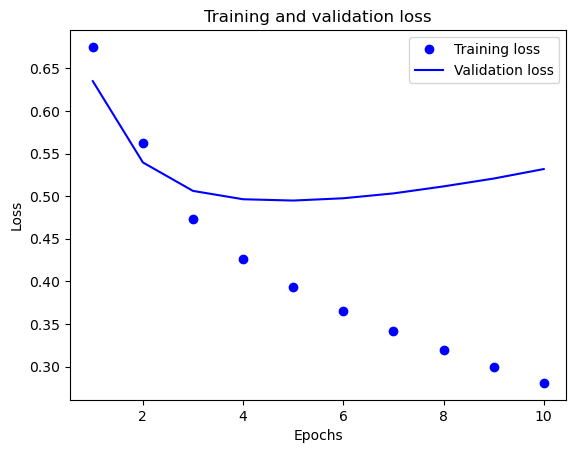

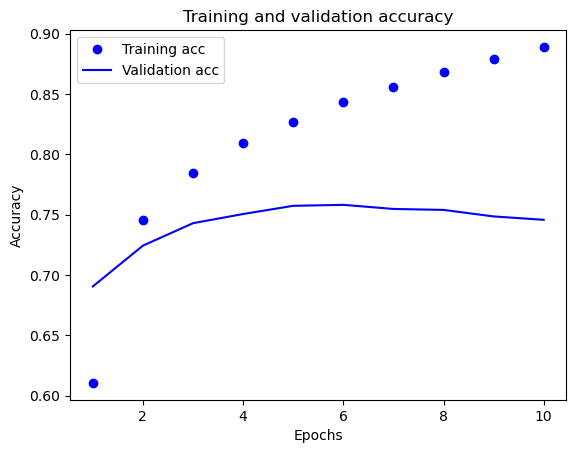

In [9]:
plot_loss_and_accuracy(history)

Merely flattening the embedded sequences and training a single  Dense  layer on top leads to a model that 
treats each word in the input sequence separately, without considering inter-word relationships and sentence structure (for example, this model would likely treat both “this movie is a bomb” and “this movie is the bomb” as being negative reviews). It’s much better to add recurrent layers or  1D convolutional layers on top of the embed-ded sequences to learn features that take into account each sequence as a whole. 


### 2. Using pretrained word embeddings
FROM SCRATCH
1. Download data

#### 0. Data set-up

In [54]:
import sys
import pathlib

sys.path.append("..")

PROJECT = "imbd"

PROJECT_DATA_DIR = f"../data/{PROJECT}/"

RAW_DATA_DIR = pathlib.Path(f"{PROJECT_DATA_DIR}/raw")
TRAIN_POS_DIR = pathlib.Path(f"{RAW_DATA_DIR}/aclImdb/train/pos")
TRAIN_NEG_DIR = pathlib.Path(f"{RAW_DATA_DIR}/aclImdb/train/neg")
TEST_POS_DIR = pathlib.Path(f"{RAW_DATA_DIR}/aclImdb/test/pos")
TEST_NEG_DIR = pathlib.Path(f"{RAW_DATA_DIR}/aclImdb/test/neg")

EXTERNAL_DATA_DIR = pathlib.Path(f"{PROJECT_DATA_DIR}/external")
GLOVE_DIR = pathlib.Path(f"{EXTERNAL_DATA_DIR}/glove.6B")

MODELS_DIR = f"../models/{PROJECT}/"

In [369]:
# import tarfile
  
# imbd_dir = pathlib.Path(f"{PROJECT_DATA_DIR}/raw/aclImdb_v1.tar.gz")
# # open file
# file = tarfile.open(imbd_dir)

# file.extractall(RAW_DATA_DIR)

In [386]:
import os


def get_labels_and_texts(POS_DIR, NEG_DIR):
    labels = []
    texts = []
    for dir_name in [POS_DIR, NEG_DIR]:    
        for fname in os.listdir(dir_name):
            if fname[-4:] == '.txt':
                f = open(os.path.join(dir_name, fname))
                texts.append(f.read())
                f.close()
                if dir_name == NEG_DIR:
                    labels.append(0)
                else:
                    labels.append(1)
    return labels, texts

# for dir_name in [TRAIN_POS_DIR, TRAIN_NEG_DIR]:    
#     for fname in os.listdir(dir_name):
#         if fname[-4:] == '.txt':
#             f = open(os.path.join(dir_name, fname))
#             texts.append(f.read())
#             f.close()
#             if dir_name == TRAIN_NEG_DIR:
#                 labels.append(0)
#             else:
#                 labels.append(1)

In [387]:
labels, texts = get_labels_and_texts(TRAIN_POS_DIR, TRAIN_NEG_DIR)

In [ ]:
labels_test = []
texts_test = []

for dir_name in [TEST_POS_DIR, TEST_NEG_DIR]:    
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts_test.append(f.read())
            f.close()
            if dir_name == TEST_NEG_DIR:
                labels_test.append(0)
            else:
                labels_test.append(1)

In [371]:
# View a sample from the texts and labels
for i in range(5):
    print(texts[i])
    print(labels[i])

Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High's satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High. A classic line: INSPECTOR: I'm here to sack one of your teachers. STUDENT: Welcome to Bromwell High. I expect that many adults of my age think that Bromwell High is far fetched. What a pity that it isn't!
1
Homelessness (or Houselessness as George Carlin stated) has been an issue for years but never a plan to help those on the street that were once considered human who did everything from going 

In [372]:
# Tokenizing the data
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100 # cuts off reviews after 100 words
training_samples = 200 # trains on 200 samples
validation_samples = 10000 # validates on 10,000 samples
max_words = 10000 # considers only the top 10,000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Splits the data into a training set and a validation set, but first shuffles the data, because you’re starting with data in which samples are ordered (all negative first, then all positive)
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
texts = [texts[i] for i in indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 88582 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


In [373]:
# View a sample from the texts and labels after shuffling
for i in range(5):
    print(texts[i])
    print(labels[i])

Another example of the unique talents of Cary Grant. A performance worthy of Oscar consideration, yet once again shunned by the Academy. Mr. Grant runs the gamut from silly to tender in this marvelous comedy about a man who decides to move out of the big city. The pitfalls of building a home are well chronicled and became the basis (loosely) for the more modern Tom Hanks vehicle, "The Money Pit".<br /><br />If you like good old fashioned comedy without the cursing and the gratuitous sex, this movie is a must see.
1
Lulu (Louise Brooks) works as a typist and is missing something in her life. She enters a Miss France contest against the wishes of her boyfriend Andre (Georges Charlia) and she wins. She sets off for the Miss Europe title leaving her boyfriend behind. She wins again but returns home to Andre because he has asked her to. Once back together, her life becomes mundane again so one night she writes a note to him and leaves to experience the fame that is waiting for her as Miss E

In [374]:
# Check that training data is evenly balanced
print("training data balance:", (len(labels)-labels.sum())/len(labels))
print("y_train balance:", (len(y_train)-y_train.sum())/len(y_train))

training data balance: 0.5
y_train balance: 0.505


In [375]:
# Parsing the GloVe word-embeddings file
embeddings_index = {}
f = open(os.path.join(GLOVE_DIR, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [376]:
# Preparing the GloVe word-embeddings matrix
embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

#### 1. Define a model
(Same architecture as before.)

In [377]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

# model = Sequential()
# model.add(Embedding(10000, 8, input_length=maxlen))
# model.add(Flatten())
# model.add(Dense(1, activation='sigmoid'))
# model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
# model.summary()

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_43 (Embedding)    (None, 100, 100)          1000000   
                                                                 
 flatten_42 (Flatten)        (None, 10000)             0         
                                                                 
 dense_83 (Dense)            (None, 32)                320032    
                                                                 
 dense_84 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [378]:
# Loading pretrained word embeddings into the Embedding layer
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [379]:
# Training and evaluating the model
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Epoch 1/10
7/7 [==============================] - 2s 237ms/step - loss: 2.3726 - acc: 0.4800 - val_loss: 0.7473 - val_acc: 0.4969
Epoch 2/10
7/7 [==============================] - 1s 202ms/step - loss: 0.6264 - acc: 0.6500 - val_loss: 0.6835 - val_acc: 0.5601
Epoch 3/10
7/7 [==============================] - 1s 181ms/step - loss: 0.4766 - acc: 0.7200 - val_loss: 0.7219 - val_acc: 0.5338
Epoch 4/10
7/7 [==============================] - 1s 175ms/step - loss: 0.4025 - acc: 0.7850 - val_loss: 0.9857 - val_acc: 0.5040
Epoch 5/10
7/7 [==============================] - 1s 194ms/step - loss: 0.2158 - acc: 0.9300 - val_loss: 0.8596 - val_acc: 0.5409
Epoch 6/10
7/7 [==============================] - 1s 193ms/step - loss: 0.3814 - acc: 0.8050 - val_loss: 0.8071 - val_acc: 0.5297
Epoch 7/10
7/7 [==============================] - 2s 250ms/step - loss: 0.1050 - acc: 0.9950 - val_loss: 0.7583 - val_acc: 0.5601
Epoch 8/10
7/7 [==============================] - 1s 215ms/step - loss: 0.0905 - acc: 1.00

In [380]:
from keras import models

# model.save_weights('pre_trained_glove_model.h5')

model.save(f'{MODELS_DIR}/pre_trained_glove_model.h5')
model = models.load_model(f'{MODELS_DIR}/pre_trained_glove_model.h5')

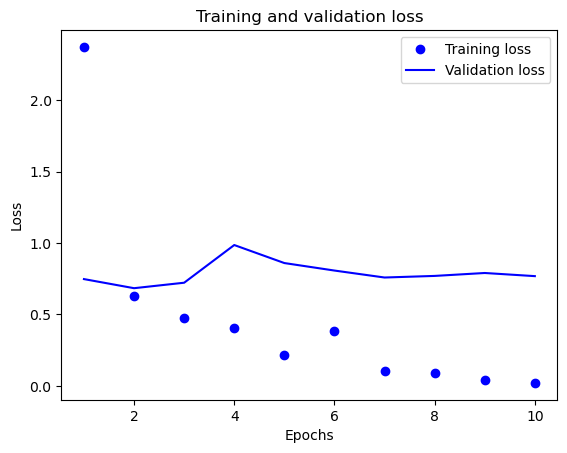

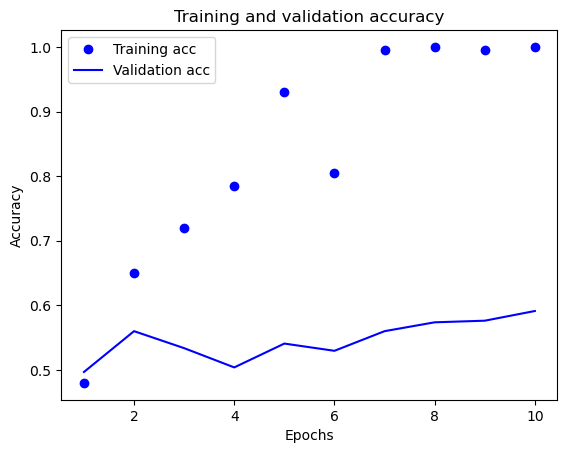

In [381]:
plot_loss_and_accuracy(history)

In [382]:
# Training the same model without pretrained word embeddings
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_44 (Embedding)    (None, 100, 100)          1000000   
                                                                 
 flatten_43 (Flatten)        (None, 10000)             0         
                                                                 
 dense_85 (Dense)            (None, 32)                320032    
                                                                 
 dense_86 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
7/7 [==============================] - 2s 254ms/step - loss: 0.6960 - acc: 0.4650 - val_loss: 0.6925 - val_acc: 0.5205
Epoch 2/10
7/7 [==============================] - 1s 227ms/step - loss: 0.6132 - acc: 1.0000 - val_loss: 0.6914 - val_acc: 0.5282
Epoch 3/10
7/7 [==============================] - 1s 223ms/step - loss: 0.5083 - acc: 0.9950 - val_loss: 0.6899 - val_acc: 0.5368
Epoch 4/10
7/7 [==============================] - 1s 228ms/step - loss: 0.3592 - acc: 0.9950 - val_loss: 0.6904 - val_acc: 0.5296
Epoch 5/10
7/7 [==============================] - 2s 261ms/step - loss: 0.2220 - acc: 1.0000 - val_loss: 0.6910 - val_acc: 0.5359
Epoch 6/10
7/7 [==============================] - 1s 231ms/step - loss: 0.1312 - acc: 1.0000 - val_loss: 0.6950 - val_acc: 0.5325
Epoch 7/10
7/7 [==============================] - 1s 228ms/step - loss: 0.0785 - acc: 1.0000 - val_loss: 0.6977 - val_acc: 0.5386
Epoch 8/10
7/7 [==============================] - 2s 258ms/step - loss: 0.0487 - acc: 1.00

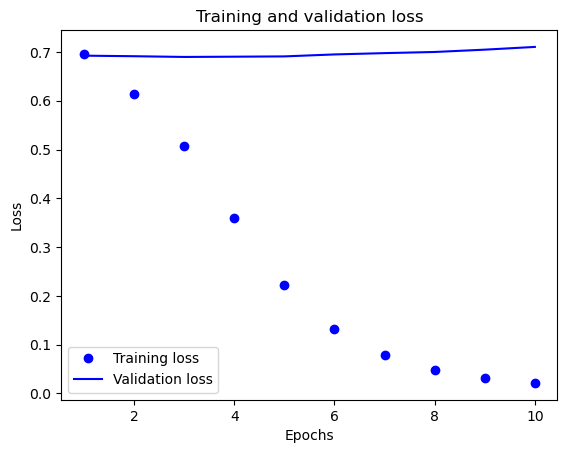

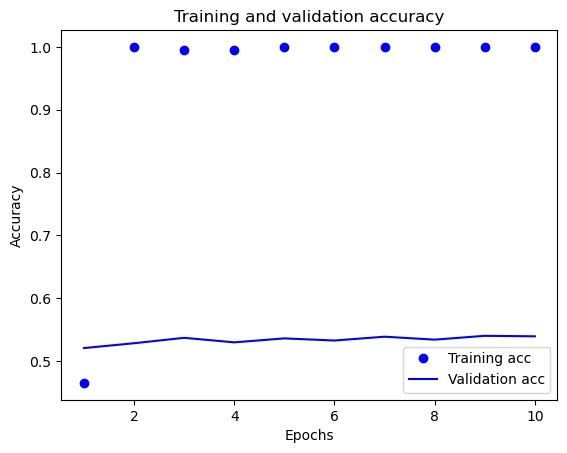

In [383]:
plot_loss_and_accuracy(history)

In [392]:
labels, texts = get_labels_and_texts(TEST_POS_DIR, TEST_NEG_DIR)
sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [394]:
model = models.load_model(f'{MODELS_DIR}/pre_trained_glove_model.h5')
model.evaluate(x_test, y_test) # [loss value, accuracy value]

782/782 [==============================] - 3s 4ms/step - loss: 0.7801 - acc: 0.5878


[0.7801319360733032, 0.5878000259399414]

## Understanding Recurrent Neural Networks

**Recurrent neural network (RNN):**  
Processes sequences by iterating through the sequence elements and maintaining a  state  containing information relative to what it has seen so far.

**Pseudocode for a simple RNN:**

```
state_t = 0
for input_t in input_sequence:
    output_t = f(input_t, state_t)
    state_t = output_t

**Pseudocode for a simple RNN with example step function f:**

```
state_t = 0
for input_t in input_sequence:
    output_t = activation(dot(W, input_t)  +  dot(U, state_t)  +  b)
    state_t = output_t

In [2]:
# Numpy implementation of a simple RNN
import numpy as np
timesteps = 100 # Number of timesteps in the input sequence
input_features = 32 # Dimensionality of the input feature space
output_features = 64 # Dimensionality of the output feature space

inputs = np.random.random((timesteps, input_features)) # Input data: random noise for the sake of the example

state_t = np.zeros((output_features,)) # Initial state: an all-zero vector

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

successive_outputs = []
for input_t in inputs: # input_t is a vector of shape (input_features,)
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b) # Combines the input with the current state (the previous output) to obtain the current output
    successive_outputs.append(output_t) # Stores this output in a list
    state_t = output_t # Updates the state of the network for the next timestep

final_output_sequence = np.concatenate(successive_outputs, axis=0) # The final output is a 2D tensor of shape (timesteps, output_features)

In [3]:
# SimpleRNN in Keras (return_sequences=False)
from  keras.models import  Sequential 
from  keras.layers import  Embedding,  SimpleRNN 
model = Sequential() 
model.add(Embedding(10000,  32)) 
model.add(SimpleRNN(32)) 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [4]:
# SimpleRNN in Keras (return_sequences=True)
model = Sequential() 
model.add(Embedding(10000,  32)) 
model.add(SimpleRNN(32,  return_sequences=True)) 
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Stacking several recurrent layers one after the other in Keras
model = Sequential()
model.add(Embedding(10000,  32))
model.add(SimpleRNN(32,  return_sequences=True))
model.add(SimpleRNN(32,  return_sequences=True))
model.add(SimpleRNN(32,  return_sequences=True))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 32)                2080      
                                                                 
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


### SimpleRNN (IMBD)

In [7]:
# Preparing the IMDB data
from keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(
    num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [8]:
# Training the model with Embedding and SimpleRNN layers
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1,  activation='sigmoid'))

model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['acc'])

history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 13s 77ms/step - loss: 0.6338 - acc: 0.6269 - val_loss: 0.4501 - val_acc: 0.8188
Epoch 2/10
157/157 [==============================] - 11s 73ms/step - loss: 0.3893 - acc: 0.8365 - val_loss: 0.3570 - val_acc: 0.8524
Epoch 3/10
157/157 [==============================] - 12s 73ms/step - loss: 0.3011 - acc: 0.8795 - val_loss: 0.3319 - val_acc: 0.8660
Epoch 4/10
157/157 [==============================] - 12s 76ms/step - loss: 0.2387 - acc: 0.9075 - val_loss: 0.4079 - val_acc: 0.8522
Epoch 5/10
157/157 [==============================] - 12s 79ms/step - loss: 0.1856 - acc: 0.9322 - val_loss: 0.4572 - val_acc: 0.8012
Epoch 6/10
157/157 [==============================] - 12s 79ms/step - loss: 0.1365 - acc: 0.9520 - val_loss: 0.4205 - val_acc: 0.8308
Epoch 7/10
157/157 [==============================] - 12s 79ms/step - loss: 0.0938 - acc: 0.9705 - val_loss: 0.4368 - val_acc: 0.8446
Epoch 8/10
157/157 [==============================] - 12s 78ms

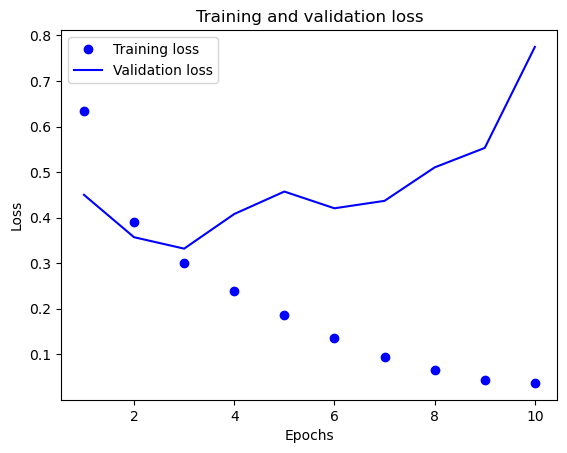

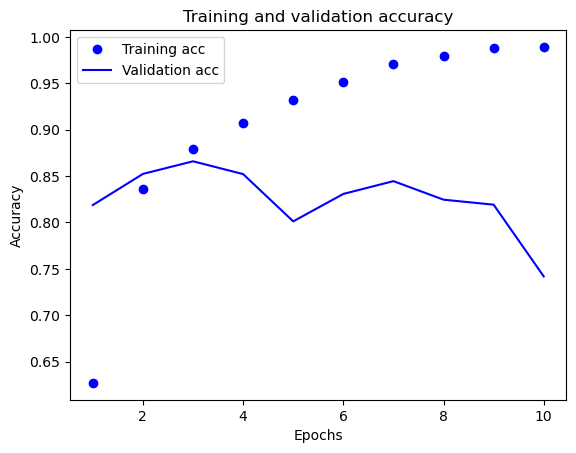

In [13]:
plot_loss_and_accuracy(history)

### LSTM (IMBD)

Epoch 1/10
157/157 [==============================] - 32s 195ms/step - loss: 0.5907 - acc: 0.6799 - val_loss: 0.4198 - val_acc: 0.8322
Epoch 2/10
157/157 [==============================] - 31s 197ms/step - loss: 0.3567 - acc: 0.8547 - val_loss: 0.3595 - val_acc: 0.8472
Epoch 3/10
157/157 [==============================] - 31s 196ms/step - loss: 0.2732 - acc: 0.8932 - val_loss: 0.3056 - val_acc: 0.8762
Epoch 4/10
157/157 [==============================] - 30s 192ms/step - loss: 0.2323 - acc: 0.9136 - val_loss: 0.4387 - val_acc: 0.8540
Epoch 5/10
157/157 [==============================] - 31s 200ms/step - loss: 0.2054 - acc: 0.9253 - val_loss: 0.4676 - val_acc: 0.8538
Epoch 6/10
157/157 [==============================] - 35s 226ms/step - loss: 0.1870 - acc: 0.9323 - val_loss: 0.3546 - val_acc: 0.8752
Epoch 7/10
157/157 [==============================] - 34s 220ms/step - loss: 0.1690 - acc: 0.9401 - val_loss: 0.3339 - val_acc: 0.8864
Epoch 8/10
157/157 [==============================] - 4

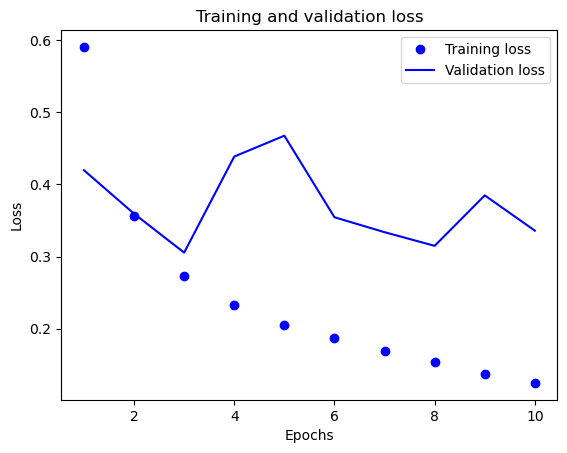

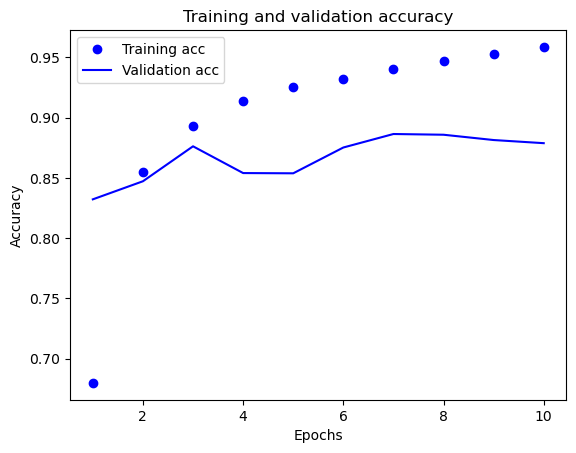

In [14]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)


plot_loss_and_accuracy(history)

## Temperature-forecasting

### Processing the data

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
import sys
import pathlib

sys.path.append("..")

PROJECT = "jena_climate"

PROJECT_DATA_DIR = f"../data/{PROJECT}/"
RAW_DATA_DIR = pathlib.Path(f"{PROJECT_DATA_DIR}/raw")

WEATHER_DATA_DIR = pathlib.Path(f"{RAW_DATA_DIR}/jena_climate_2009_2016.csv")

# TRAIN_POS_DIR = pathlib.Path(f"{RAW_DATA_DIR}/aclImdb/train/pos")
# TRAIN_NEG_DIR = pathlib.Path(f"{RAW_DATA_DIR}/aclImdb/train/neg")
# TEST_POS_DIR = pathlib.Path(f"{RAW_DATA_DIR}/aclImdb/test/pos")
# TEST_NEG_DIR = pathlib.Path(f"{RAW_DATA_DIR}/aclImdb/test/neg")

# EXTERNAL_DATA_DIR = pathlib.Path(f"{PROJECT_DATA_DIR}/external")
# GLOVE_DIR = pathlib.Path(f"{EXTERNAL_DATA_DIR}/glove.6B")

# MODELS_DIR = f"../models/{PROJECT}/"

In [8]:
f = open(WEATHER_DATA_DIR)
data = f.read()
f.close()
lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]
print(header)
print(len(lines))

float_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(',')[1:]]
    float_data[i, :] = values

print(float_data)

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420451
[[ 9.9652e+02 -8.0200e+00  2.6540e+02 ...  1.0300e+00  1.7500e+00
   1.5230e+02]
 [ 9.9657e+02 -8.4100e+00  2.6501e+02 ...  7.2000e-01  1.5000e+00
   1.3610e+02]
 [ 9.9653e+02 -8.5100e+00  2.6491e+02 ...  1.9000e-01  6.3000e-01
   1.7160e+02]
 ...
 [ 9.9982e+02 -3.1600e+00  2.7001e+02 ...  1.0800e+00  2.0000e+00
   2.1520e+02]
 [ 9.9981e+02 -4.2300e+00  2.6894e+02 ...  1.4900e+00  2.1600e+00
   2.2580e+02]
 [ 9.9982e+02 -4.8200e+00  2.6836e+02 ...  1.2300e+00  1.9600e+00
   1.8490e+02]]


In [9]:
df = pd.read_csv(WEATHER_DATA_DIR)
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420446,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420447,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420448,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420449,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


In [10]:
float_data = df.to_numpy()
print(float_data, end="\n\n\n")

# remove first value in each row (date)
float_data = float_data[:, 1:]

# convert to float64 to avoid sqrt error
# TypeError: loop of ufunc does not support argument 0 of type float which has no callable sqrt method
float_data = np.array(float_data, dtype=np.float64)

print(float_data)

[['01.01.2009 00:10:00' 996.52 -8.02 ... 1.03 1.75 152.3]
 ['01.01.2009 00:20:00' 996.57 -8.41 ... 0.72 1.5 136.1]
 ['01.01.2009 00:30:00' 996.53 -8.51 ... 0.19 0.63 171.6]
 ...
 ['31.12.2016 23:40:00' 999.82 -3.16 ... 1.08 2.0 215.2]
 ['31.12.2016 23:50:00' 999.81 -4.23 ... 1.49 2.16 225.8]
 ['01.01.2017 00:00:00' 999.82 -4.82 ... 1.23 1.96 184.9]]


[[ 9.9652e+02 -8.0200e+00  2.6540e+02 ...  1.0300e+00  1.7500e+00
   1.5230e+02]
 [ 9.9657e+02 -8.4100e+00  2.6501e+02 ...  7.2000e-01  1.5000e+00
   1.3610e+02]
 [ 9.9653e+02 -8.5100e+00  2.6491e+02 ...  1.9000e-01  6.3000e-01
   1.7160e+02]
 ...
 [ 9.9982e+02 -3.1600e+00  2.7001e+02 ...  1.0800e+00  2.0000e+00
   2.1520e+02]
 [ 9.9981e+02 -4.2300e+00  2.6894e+02 ...  1.4900e+00  2.1600e+00
   2.2580e+02]
 [ 9.9982e+02 -4.8200e+00  2.6836e+02 ...  1.2300e+00  1.9600e+00
   1.8490e+02]]


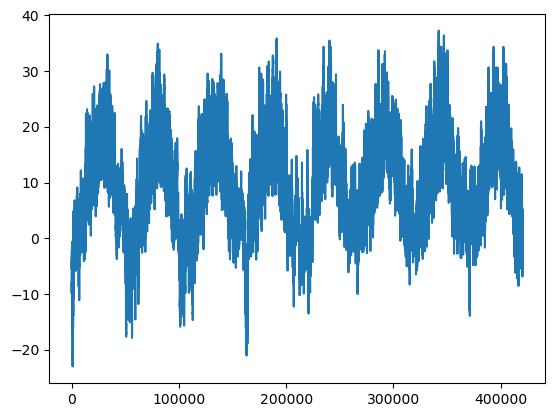

In [11]:
# plot temperature over time using df
temp = df['T (degC)']
plt.plot(range(len(temp)), temp)

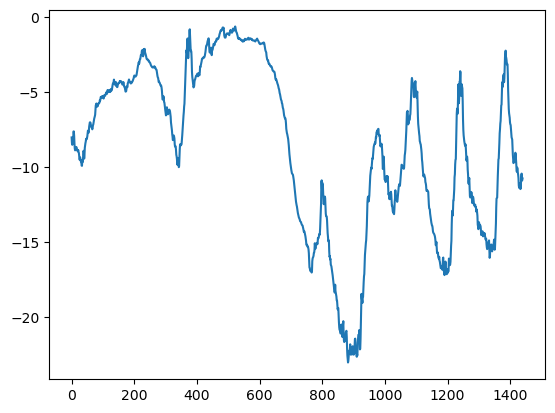

In [12]:
plt.plot(range(1440), temp[:1440])

In [13]:
mean = float_data[:200000].mean(axis=0)
float_data -= mean
std = float_data[:200000].std(axis=0)
float_data /= std

In [14]:
# Generator yielding timeseries samples and their targets
def generator(data, lookback, delay, min_index, max_index, shuffle=False, batch_size=128, step=6):
    # If max_index is not specified, set it to len(data) - delay - 1
    if max_index is None:
        max_index = len(data) - delay - 1
    # Initialize i
    i = min_index + lookback
    # Enter an infinite loop
    while 1:
        ## Select indices of the next batch
        # If shuffle is True, select batch_size random rows from the range min_index + lookback to max_index
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        # If shuffle is False, select the next batch_size rows in chronological order, starting from i and wrapping around to min_index + lookback if necessary
        else:
            # wrap to beginning if i + batch_size >= max_index
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)
        # Initialize samples array with shape (batch_size, lookback // step, data.shape[-1])
        samples = np.zeros((len(rows),
                            lookback // step,
                            data.shape[-1]))
        # Initialize targets array with shape (batch_size,)
        targets = np.zeros((len(rows),))

        # For each row in the batch, select lookback timesteps of input data starting from the row and going back lookback timesteps at a time, with a step of step
        # This creates a 3D array of shape (batch_size, lookback // step, data.shape[-1])
        # Select the target data for each row in the batch, which is delay timesteps in the future, and append it to the targets array
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        # Yield the samples and targets arrays as a tuple
        yield samples, targets

In [15]:
lookback = 1440
step = 6
delay = 144
batch_size = 128

train_gen = generator(float_data,
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=200000,
                      shuffle=True,
                      step=step,
                      batch_size=batch_size)

val_gen = generator(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=200001,
                    max_index=300000,
                    step=step,
                    batch_size=batch_size)

test_gen = generator(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=300001,
                    max_index=None,
                    step=step,
                    batch_size=batch_size)

val_steps = (300000 - 200001 - lookback)
test_steps = (len(float_data) - 300001 - lookback)

### A common-sense, non-machine-learning baseline

In [16]:
def evaluate_naive_method():
    batch_maes = []
    for step in range(val_steps):
        samples, targets = next(val_gen)
        preds = samples[:, -1, 1]
        mae = np.mean(np.abs(preds - targets))
        batch_maes.append(mae)
    print(np.mean(batch_maes))
    
evaluate_naive_method()

0.2896994197960971


In [17]:
# Convert the MAE back to a Celsius error
0.2896994197960971 * std[1]

2.5645638478601644

###  Training and evaluating a densely connected model

In [19]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Flatten(input_shape=(lookback // step, float_data.shape[-1])))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')

In [23]:
print("lookback:",lookback)
print("step:",step)
print("lookback // step:", lookback // step)

lookback: 1440
step: 6
lookback // step: 240


In [25]:
# Use GPU...
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps)

In [ ]:
plot_loss_and_accuracy(history)

### Training and evaluating a GRU-based model

In [26]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32, input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')

In [ ]:
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps)

In [ ]:
plot_loss_and_accuracy(history)

### Training and evaluating a dropout-regularized GRU-based model

In [ ]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32,
                     dropout=0.2,
                     recurrent_dropout=0.2,
                     input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')

In [ ]:
history = model.fit_generator(train_gen,
steps_per_epoch=500,
epochs=40,
validation_data=val_gen,
validation_steps=val_steps)

In [ ]:
plot_loss_and_accuracy(history)

###  Stacking recurrent layers

In [27]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32,
                     dropout=0.1,
                     recurrent_dropout=0.5,
                     return_sequences=True,
                     input_shape=(None, float_data.shape[-1])))
model.add(layers.GRU(64, activation='relu',
                     dropout=0.1,
                     recurrent_dropout=0.5))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')

In [ ]:
history = model.fit_generator(
    train_gen,
    steps_per_epoch=500,
    epochs=40,
    validation_data=val_gen,
    validation_steps=val_steps,
)

In [ ]:
plot_loss_and_accuracy(history)

### Training a bidirectional GRU

In [28]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(
    layers.Bidirectional(layers.GRU(32), input_shape=(None, float_data.shape[-1]))
)
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss="mae")

In [ ]:
history = model.fit_generator(
    train_gen,
    steps_per_epoch=500,
    epochs=40,
    validation_data=val_gen,
    validation_steps=val_steps,
)

In [ ]:
plot_loss_and_accuracy(history)

## Sequence Processing with 1D Convnets

### Prepare IMBD data

In [34]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 10000
max_len = 500
print('Loading data...')

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 500)
x_test shape: (25000, 500)


###  Training and evaluating a simple 1D convnet on the IMDB data

In [35]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.summary()

model.compile(optimizer=RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 128)          1280000   
                                                                 
 conv1d (Conv1D)             (None, 494, 32)           28704     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 98, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 92, 32)            7200      
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_5 (Dense)             (None, 1)                

c:\Users\tmane\miniconda3\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [36]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 19s 117ms/step - loss: 0.7095 - acc: 0.5268 - val_loss: 0.6866 - val_acc: 0.5422
Epoch 2/10
157/157 [==============================] - 18s 115ms/step - loss: 0.6664 - acc: 0.6639 - val_loss: 0.6682 - val_acc: 0.6294
Epoch 3/10
157/157 [==============================] - 18s 117ms/step - loss: 0.6298 - acc: 0.7465 - val_loss: 0.6264 - val_acc: 0.6986
Epoch 4/10
157/157 [==============================] - 20s 125ms/step - loss: 0.5572 - acc: 0.7957 - val_loss: 0.5348 - val_acc: 0.7514
Epoch 5/10
157/157 [==============================] - 19s 118ms/step - loss: 0.4494 - acc: 0.8249 - val_loss: 0.4673 - val_acc: 0.8132
Epoch 6/10
157/157 [==============================] - 19s 123ms/step - loss: 0.3710 - acc: 0.8586 - val_loss: 0.4595 - val_acc: 0.8236
Epoch 7/10
157/157 [==============================] - 18s 118ms/step - loss: 0.3218 - acc: 0.8820 - val_loss: 0.4405 - val_acc: 0.8468
Epoch 8/10
157/157 [==============================] - 1

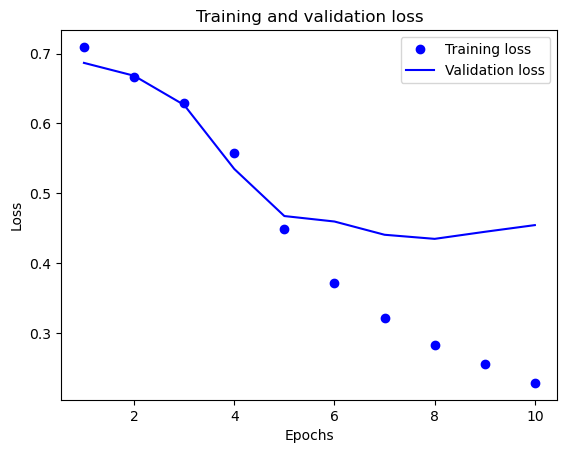

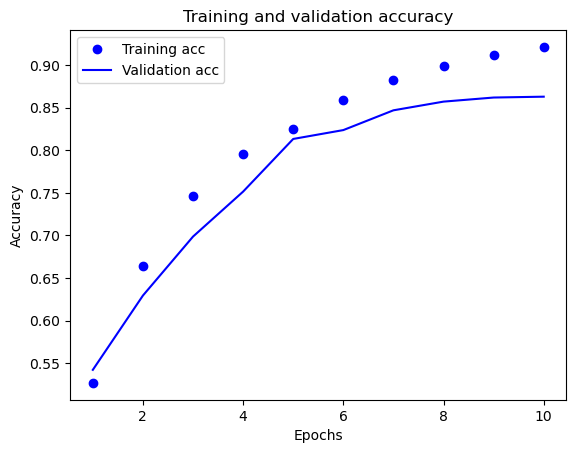

In [39]:
plot_loss_and_accuracy(history)

 ### Combining CNNs and RNNs to process long sequences

In [40]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Conv1D(32, 5, activation='relu',
                        input_shape=(None, float_data.shape[-1])))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')

In [42]:
# Use GPU
history = model.fit_generator(
    train_gen,
    steps_per_epoch=500,
    epochs=20,
    validation_data=val_gen,
    validation_steps=val_steps,
)

### Preparing higher-resolution data generators for the Jena (weather) dataset

In [43]:
step = 3 # Previously set to 6 (1 point per hour); now 3 (1 point per 30 min)
lookback = 720
delay = 144

train_gen = generator(
    float_data,
    lookback=lookback,
    delay=delay,
    min_index=0,
    max_index=200000,
    shuffle=True,
    step=step,
)

val_gen = generator(
    float_data,
    lookback=lookback,
    delay=delay,
    min_index=200001,
    max_index=300000,
    step=step,
)

test_gen = generator(
    float_data,
    lookback=lookback,
    delay=delay,
    min_index=300001,
    max_index=None,
    step=step,
)

val_steps = (300000 - 200001 - lookback) // 128
test_steps = (len(float_data) - 300001 - lookback) // 128

### Model combining a 1D convolutional base and a GRU layer

In [44]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Conv1D(32, 5, activation='relu',
                        input_shape=(None, float_data.shape[-1])))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.GRU(32, dropout=0.1, recurrent_dropout=0.5))
model.add(layers.Dense(1))
model.summary()

model.compile(optimizer=RMSprop(), loss='mae')

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_5 (Conv1D)           (None, None, 32)          2272      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, None, 32)         0         
 1D)                                                             
                                                                 
 conv1d_6 (Conv1D)           (None, None, 32)          5152      
                                                                 
 gru_4 (GRU)                 (None, 32)                6336      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 13,793
Trainable params: 13,793
Non-trainable params: 0
__________________________________________________

In [45]:
# 47 mins CPU
history = model.fit_generator(
    train_gen,
    steps_per_epoch=500,
    epochs=20,
    validation_data=val_gen,
    validation_steps=val_steps,
)

Epoch 1/20


C:\Users\tmane\AppData\Local\Temp\ipykernel_888\716858019.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


500/500 [==============================] - 42s 79ms/step - loss: 0.3320 - val_loss: 0.2859
Epoch 2/20
500/500 [==============================] - 39s 77ms/step - loss: 0.2949 - val_loss: 0.2789
Epoch 3/20
500/500 [==============================] - 39s 77ms/step - loss: 0.2816 - val_loss: 0.2744
Epoch 4/20
500/500 [==============================] - 38s 77ms/step - loss: 0.2719 - val_loss: 0.2805
Epoch 5/20
500/500 [==============================] - 38s 76ms/step - loss: 0.2668 - val_loss: 0.2888
Epoch 6/20
500/500 [==============================] - 38s 77ms/step - loss: 0.2590 - val_loss: 0.2757
Epoch 7/20
500/500 [==============================] - 39s 77ms/step - loss: 0.2553 - val_loss: 0.2897
Epoch 8/20
500/500 [==============================] - 39s 77ms/step - loss: 0.2486 - val_loss: 0.2839
Epoch 9/20
500/500 [==============================] - 39s 77ms/step - loss: 0.2443 - val_loss: 0.2866
Epoch 10/20
500/500 [==============================] - 42s 84ms/step - loss: 0.2385 - val_los

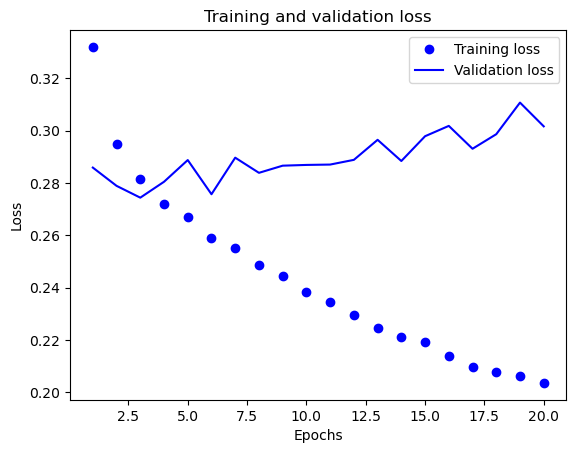

In [52]:
plot_loss_and_accuracy(history, accuracy=False)

In [68]:
from keras import models

#model.save(f'{MODELS_DIR}/1Dconv_GRU_glove_model.h5')
model = models.load_model(f'{MODELS_DIR}/1Dconv_GRU_glove_model.h5')

In [64]:
# Didn't work after saving then calling the model.
# Try again after using a GPU to run.
plot_loss_and_accuracy(model.history, accuracy=False)

AttributeError: 'NoneType' object has no attribute 'history'